# Types of Classification

## Decision Tree
* **Graphical representation** of all the possible solutions to a decision.
* **Decisions** are based on some conditions.
* **Decision made** can be easily explained.

### Example Diagram (Logic Flow)
**Root Node:** Am I hungry?
* **No** $\rightarrow$ Go to sleep
* **Yes** $\rightarrow$ *Check Condition:* **Have I $25?**
    * **Yes** $\rightarrow$ Go to restaurant
    * **No** $\rightarrow$ Buy a hamburger

---
**Other Classification Algorithms listed:**
* Random Forest
* Naïve Bayes
* KNN (K-Nearest Neighbors)

##  Definition of a Decision Tree

A decision tree is a graphical representation of all the possible solutions to a decision based on certain conditions.
It helps you move from a question or problem to a final decision by following a sequence of logical rules.

### 1. Key Components of a Decision Tree

- **Root Node**
The starting point of the tree. It represents the first decision or condition.

- **Decision Nodes**
Intermediate points where another condition or decision is evaluated.

- **Leaf Nodes**
Final outcomes or decisions such as yes or no, accept or decline.

### 2. Purpose of a Decision Tree

- To simplify complex decisions by breaking them down into smaller steps.

- To visually represent choices, conditions, and final outcomes.

- To help in decision making, classification, and prediction tasks.

### 3. Example from the Image: Should I accept a new job offer

The decision tree analyzes the job offer using conditions.

- Condition 1: Is the salary at least 50,000?

If no, decline offer.

If yes, move to next condition.

- Condition 2: Is the commute more than 1 hour?

If yes, decline offer.

If no, move to next condition.

- Condition 3: Does the job offer free coffee?

If yes, accept offer.

If no, decline offer.

### 4. Why Decision Trees are Useful

- They are easy to read and interpret.

- They mimic human decision making.

- They work well for both classification and regression problems.

- They show step by step how each decision is reached.

# Decision Tree Example: Fruit Classification

## Dataset

| Color | Diameter | Label |
|-------|----------|--------|
| Green | 3 | Mango |
| Yellow | 3 | Lemon |
| Red | 1 | Grape |
| Yellow | 3 | Mango |
| Red | 1 | Grape |

## Root Node

Split on: **Diameter ≥ 3**  
Information Gain: **0.37**

### Left Branch (Diameter < 3)
- All samples: Grape  
- Leaf: **100 percent Grape**

### Right Branch (Diameter ≥ 3)
Samples: Mango, Mango, Lemon  
Next split: **Color == Yellow**  
Information Gain: **0.11**

#### Branch 1 (Color not Yellow)
- Leaf: **100 percent Mango**

#### Branch 2 (Color Yellow)
- Mango  
- Lemon  
- Leaf: **50 percent Mango, 50 percent Lemon**


### 4. Decision Tree Terminology

#### Root Node
Represents the entire dataset or population. This node is divided into two or more homogeneous groups.

#### Parent and Child Nodes
The root node is the parent node. Any nodes that emerge from it through splitting are known as child nodes.

#### Splitting
Splitting is the process of dividing a node into sub nodes based on certain conditions. It decides how the dataset gets partitioned.

#### Branch or Subtree
A branch or subtree is formed when a node is split. Each branch represents a possible decision path.

#### Leaf Node
A leaf node (terminal node) represents the final output of the decision tree. It cannot be split further.

#### Pruning
Pruning is the opposite of splitting. It removes unnecessary branches from the tree to prevent overfitting and improve model performance.


### 5. Concept of Impurity 

- Impurity measures how mixed or impure the classes are in a decision tree node.

- High impurity means the node contains many different classes.

- Low impurity means the node is cleaner and more homogeneous.

- Decision trees try to reduce impurity with each split.

- A node with zero impurity contains only one class.

### 6. Concept of Entropy

- Entropy measures the disorder in a node, meaning how evenly the classes are distributed.

- Lower entropy indicates a purer node, so decision trees choose splits that reduce entropy the most.

# Hands on Practice:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   

from sklearn.preprocessing import LabelEncoder   # for train test splitting
from sklearn.model_selection import train_test_split   # for decision tree object
from sklearn.tree import DecisionTreeClassifier   # for checking testing results
from sklearn.metrics import classification_report, confusion_matrix   # for visualizing tree
from sklearn.tree import plot_tree

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.shape

(150, 5)

In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

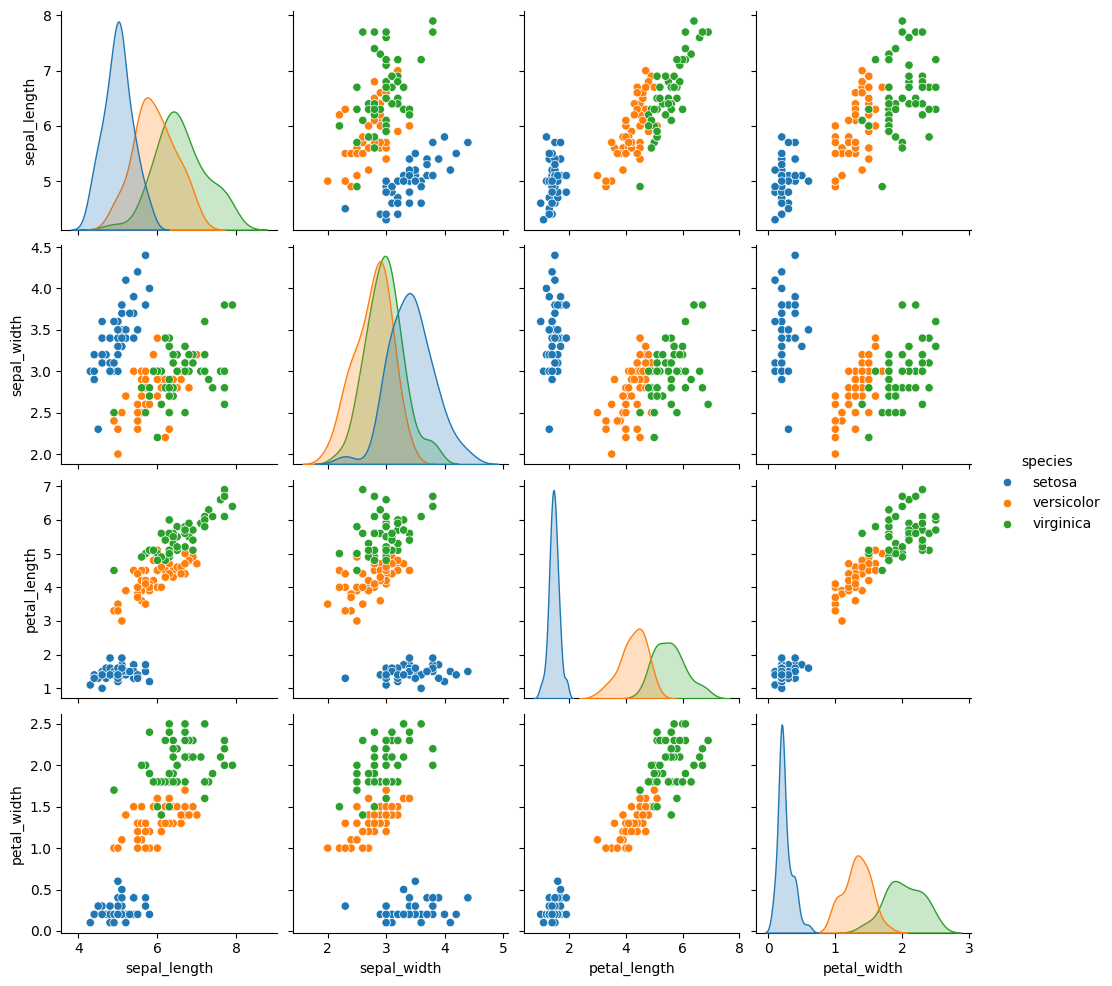

In [8]:
sns.pairplot(data = iris , hue = 'species')

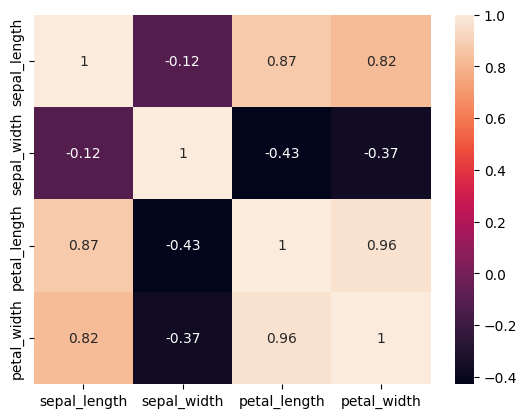

In [10]:
sns.heatmap(iris.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.show()

In [11]:
target = iris['species']
df1 = iris.copy()
df1 = df1.drop('species', axis = 1)

In [13]:
# Defining the Attriburtes
X = df1

In [14]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
y = target

In [17]:
# Spliting the data - 80:20 ratio 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [18]:
# Defining the decision tree algorithmtree = DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train , y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [20]:
# Predicting the values of test data 
from sklearn.metrics import classification_report
y_pred = dtree.predict(X_test)
print('Classification Report - \n' , classification_report(y_test , y_pred))

Classification Report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



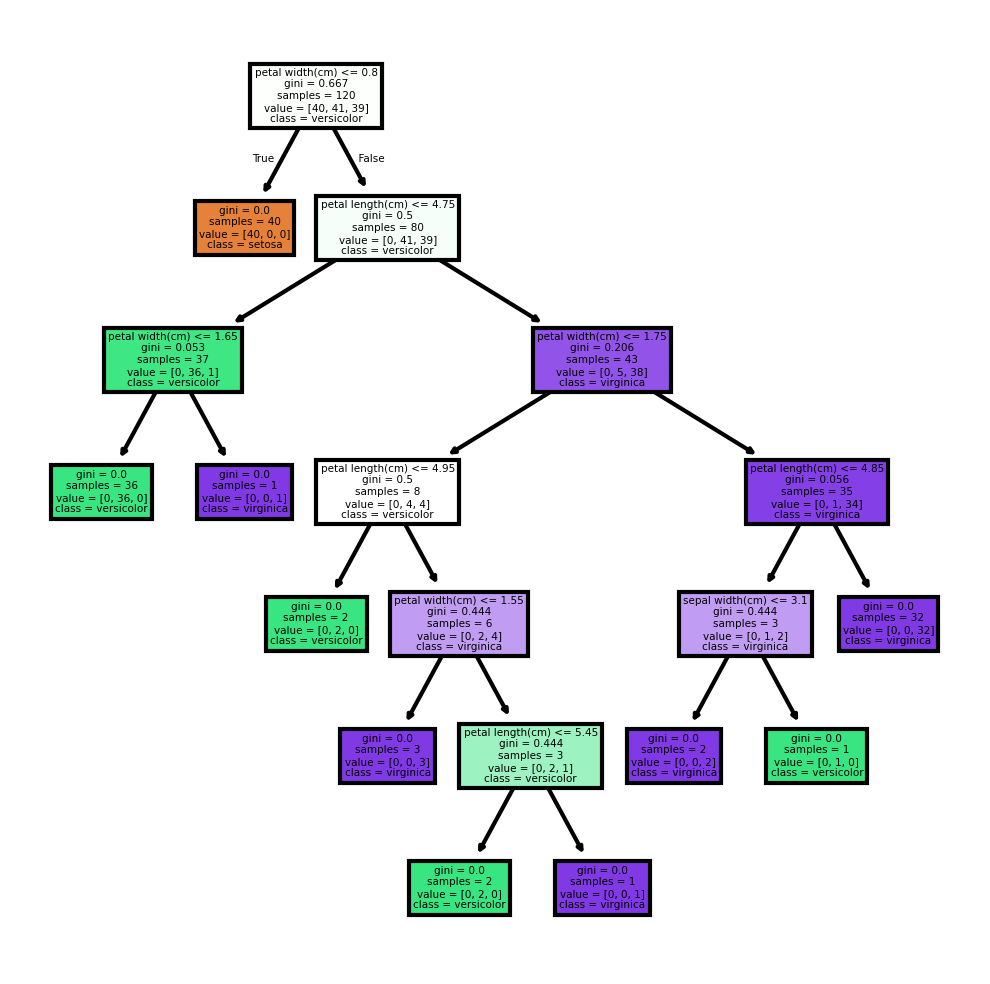

In [22]:
from sklearn import tree
fn = ['sepal length(cm)' , 'sepal width(cm)' , 'petal length(cm)' , 'petal width(cm)']
cn = ['setosa' , 'versicolor' , 'virginica']
fig, axes = plt.subplots(nrows=1, figsize=(4,4), dpi=300)

tree.plot_tree(
    dtree,
    feature_names=fn,
    class_names=cn,
    filled=True,
    ax=axes
)

fig.savefig("DecisionTree.png")

# The End !!